# Table of contents
1. [Motivation](#Motivation)
2. [Basic](#Basic)
    1. [Extracting Data from wikipedia](#Extracting)
    2. [Gather each scientists wikipage](#Get_wiki)
    3. [Parsing the data for constructing the network](#network)
    4. [Parsing the data for text analysis](#text_analyses)
    5. [Presentation of final dataset](#presentation_dataset)
3. [Tools, theory, and analysis](#analyse)
    1. [Communities](#communities)
    2. [TF-IDF](#TF-IDF)
    3. [HSBM](#HSBM)
4. [Discussion. Think critically about your creation](#discussion)
5. [Contributions](#contributions)

# Motivation <a name="Motivation"></a>

- What is your dataset?

- Why did you choose this/these particular dataset(s)?

- What was your goal for the end user's experience?

Overall our dataset consists of XXXX amount of theorists wikipedia pages, gathered from five wikipedia lists each representing a science within the overall theme of social science. By using the researchers references to each other on the wikipedia pages we construct edges, and thus we are able to map the overall science community of the social sciences. Furtermore by using community detection, TF-IDF, and HSBM we hope to nuance the five traditional social science communities. 

By looking into the researchers from each discipline we hope to find patterns between the five social sciences. We will start our analysis by looking into the characteristics of the community of the five social sciences. Thereafter we will examine the communities of the social sciences, by doing this we will answer these questions: Are the traditional categories within the social science community actually also apt/suitable for the social science community? Or are the categorizations just a historic relic, and maybe more relevant categorizations within the social sciences exist? By looking into this it becomes possible to either deny or affirm the different scientists relevance within the different disciplines of the social science community. 

Our overall goal for the end user experience is to give an easy overview of the social sciences. We hope that our community detection models and our HSMB models maybe can give interested people a nuance in their view of the social sciences, instead of keeping to the old disciplines. By looking into our website interested researchers will maybe get inspiration to move out and beyond their own social science. (MÅSKE BARE UD)

# Basic <a name="Basix"></a>
- Write about your choices in data cleaning and preprocessing

- Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)

##### TING DER MANGLER HER: 
- Lidt stats skal skrive ind rundt omkring. Særligt netværksdelen. 
- Jeg har ikke skrevet om hvornår vi går fra hele netværket og kun til kernen. 

### Extracting data from wikipedia <a name="Extracting"></a>
- Write about your choices in data cleaning and preprocessing

To construct this "community" of social scientists, we found inspiration by examining the Faculty of Social Science at Copenhagen University. The Social Science faculty have five overall departments: Sociology, Psychology, Economy, Anthropology, and Political Science. For each of these five categories we have a list of scientists on wikipedia. We used these five lists of scientists to find and all the scientists in our final dataset. After gathering all the names from the five lists, we then gather each individual scientists from wikipage. Thus our data gathering process has two parts: 1) get social scientists from each of the five lists, 2) gather each scientists wikipage. 

For cleaning and preprocessing the data we work with two datasets: One is an edgelist for constructing networks. And the second dataset is for text analysis on the theorists wikipages.  

If a scientist is mentioned on more than one list we classify them as being in a sixth category 'Multiple'. 

Below we go more in depth with each of the two steps and our choices in the following sections. 

#### Get social scientists from each of the five lists

Here we called the wiki API for each of the five lists and then sorted the data. When cleaning the lists for theorists we used a regular expression `\n\*(?: )?\[\[(.*?)(?:\|.*?)?\]\]*`

In [2]:
####################################CALLING THE API for the five lists####################################################
import requests
import pandas as pd
from bs4 import BeautifulSoup
import regex as re 
import json

def get_wiki(_page, get_txt = False):
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    title = f"titles={_page}"
    content = "prop=revisions&rvprop=content&rvslots=*"
    dataformat ="format=json"
    
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    print(query)
    
    if get_txt == True:
        resp = requests.get(query).json()
        page_id = [i for i in resp['query']['pages'].keys()][0] # get page id
        txt = resp['query']['pages'][page_id]['revisions'][0]['slots']['main']['*']
        return txt
    
    else:
        return requests.get(query).json()

resp_soc = get_wiki("List_of_sociologists")
resp_ant = get_wiki("List_of_anthropologists")
resp_pol = get_wiki("List_of_political_scientists")
resp_psy = get_wiki("List_of_psychologists")
resp_eco = get_wiki("List_of_economists")

https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&rvslots=*&titles=List_of_sociologists&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&rvslots=*&titles=List_of_anthropologists&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&rvslots=*&titles=List_of_political_scientists&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&rvslots=*&titles=List_of_psychologists&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&rvslots=*&titles=List_of_economists&format=json


In [ ]:
##################################Cleaning each social scientist discipline###################################
''' Soc '''
txt = resp_soc['query']['pages']['254243']['revisions'][0]['slots']['main']['*']
txt = txt.split('==A==')[1] # drop intro tekst
txt = txt.split('==References==')[0] # drop trailing stuff
sociologists = re.findall('\n\*(?: )?\[\[(.*?)(?:\|.*?)?\]\]*',txt)
print(f'Sociologists: {len(sociologists)}')

''' Ant '''
txt = resp_ant['query']['pages']['728']['revisions'][0]['slots']['main']['*']
txt = txt.split('==A==')[1] # drop intro tekst
txt = txt.split('==Fictional anthropologists==')[0] # drop trailing stuff
anthropologists = re.findall('\n\*(?: )?\[\[(.*?)(?:\|.*?)?\]\]*',txt)
print(f'Anthropologist: {len(anthropologists)}')

''' Eco '''
txt = resp_eco["query"]['pages']['10231']['revisions'][0]['slots']['main']['*']
txt = txt.split('==A==')[1] # drop intro tekst
txt = txt.split('==See also==')[0] # drop trailing stuff
economists = re.findall('\n\*(?: )?\[\[(.*?)(?:\|.*?)?\]\]*',txt)
print(f'economists: {len(economists)}')

''' Psy '''
txt = resp_psy['query']['pages']['199877']['revisions'][0]['slots']['main']['*']
txt = txt.split('== A ==')[1] # drop intro tekst
txt = txt.split('==See also==')[0] # drop trailing stuff
psychologists = re.findall('\n\*(?: )?\[\[(.*?)(?:\|.*?)?\]\]*',txt)
print(f'Psychologists: {len(psychologists)}')

''' Pol '''
txt = resp_pol['query']['pages']['37559']['revisions'][0]['slots']['main']['*']
txt = txt.split('== A ==')[1] # drop intro tekst
txt = txt.split('== See also ==')[0] # drop trailing stuff
political_scientists = re.findall('\n\*(?: )?\[\[(.*?)(?:\|.*?)?\]\]*',txt)
print(f'Political_scientists: {len(political_scientists)}')

# To dict
science_dict = {'soc':sociologists,
                'anth':anthropologists,
                'eco': economists,
                'psy': psychologists,
                'pol': political_scientists}

with open('science_name_dict.json', 'w', encoding = 'utf-8') as f:
    json.dump(science_dict,f)

### Gather each scientists wikipage <a name="Get_wiki"></a>

For gathering the theorists wikipages we use the "get_wiki" function, which we also used to gather the fives lists before. For some of the page links, the link refers to a topic or a section of a larger wikipage, where it is necessary to skip. Also for some of the page links, the link redirects to another wikipage/link, when this happens it is necessary to save the new link and run the scrappingproccess again på the new page. After gathering and cleaning dictionaries we end up with a total of 3194 scientists, distributed as follows: Sociologists: 780, Anthropologists: 277, Economists: 1111, Psychologists: 463, Political Scientists: 563.  

In [ ]:
import time
import copy

with open('science_name_dict.json', 'r', encoding = 'utf-8') as f:
    science_dict = json.load(f)

# Copy dict - deep copy as the values are nested in a list
new_science_dict = copy.deepcopy(science_dict)

    
''' Scrape the pages '''
for field, nodes in science_dict.items():
    for node in nodes:
        time.sleep(0.2)
        # Sometimes the pagelink refers to a site of a topic or a section of a larger wikipage. 
        # This we can spot by looking for a questionmark or hashtag.  
        if '#' in node or '?' in node: 
            new_science_dict[field].remove(node) # remove node 
            print('Skipping: ', node)
            continue
            
        node = node.replace(' ', '_')
        try:
            txt = get_wiki(node, get_txt = True)
            
            # Sometimes the page link we have gotten from one of our five lists is a "redirect"
            # Here it is nessecary to extract this new one. 
            if "#REDIRECT" in txt.upper(): # if it is a redirect
                new_science_dict[field].remove(node.replace('_', ' '))  # delete the old value 
                node = [re.findall('\[\[(.*?)(?:\|.*?)?\]\]', txt)[0]] # redirected link 
                print(f"## Redirect! {node}")
                new_science_dict[field] += node # append the new node (only element in a list) to the science_dict 
                node = node[0].replace(' ', '_') # extract from the list and replace 
                
                if '#' in node or '?' in node: 
                    new_science_dict[field].remove(node.replace('_', ' ')) # remove from dict
                    print('Skipping: ', node)
                    continue                    
                    
                txt = get_wiki(node, get_txt=True)
                
        except KeyError as e: # if the page is incomplete (red hyperlinks)
            new_science_dict[field].remove(node.replace('_', ' ')) # remove from dict 
            print(e, node)
            continue
        
        with open(f'wiki_content/{node}.txt', 'w', encoding = 'utf-8') as f:
            f.write(txt)
            
# Gem den opdaterede dict 
with open('science_name_dict.json', 'w', encoding = 'utf-8') as f:
    json.dump(new_science_dict,f)

### Parsing the data for the network <a name="network"></a>

For parsing all the files for constructing the edgelist in our network we gather all the links from the wikipages using the regular expression `\[\[(.*?)(?:\|.*?)?]]`. After gathering all the links from the wikipage we then remove all links which does not correspond to any of the theorists in our dataset. 

In [11]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import regex as re 
from os import listdir
from os.path import isfile, join
import json 

# get files in directory 
onlyfiles = [f for f in listdir("wiki_content") if isfile(join("wiki_content", f))]

In [13]:
# Make link list to construct a network
''' Extract links '''
theo_dict  = {}
for file in onlyfiles: # loop over the files 
    with open(f'wiki_content/{file}','r', encoding = 'utf-8') as f:
        txt = f.read() # read files 
        links = re.findall('\[\[(.*?)(?:\|.*?)?]]', txt) # find links
        name = file.split('.txt')[0].replace('_',' ') # get name of the scientist
        theo_dict.update({name:links}) # update dict with scientist:all_links

''' WHo links to who '''
# dict with scientist:link_to_other_scientists
# .replace('_', ' ') on names, because some names are weird like 'Anselm_Strauss'
link_dict = {theorist:[_name.replace('_', ' ') for _name in links \
                       if _name.replace('_', ' ') in theo_dict.keys()]\
                       for theorist, links in theo_dict.items()}

''' To Link list '''
# Convert to list of (node_a, node_b)-set
link_list = [(node_a, node_b) for node_a, nodes in link_dict.items() for node_b in nodes]

''' Save the data for easier import when constructing network '''
with open("edge_list.json", "w") as f:
    json.dump(link_list, f)
    
with open("node_list.json", "w") as f:
    json.dump(list(link_dict.keys()), f)    

We convert the dictionary `science_dict` to a structure where scientists are keys, and their dicipline is the value. If a scientist appears in more than one of the lists from wikipedia, we categorize them as `multiple`. The new dictionary will be used as attributes in the network. 

In [14]:
''' Get science attribute '''

with open('science_name_dict.json', 'r', encoding = 'utf-8') as f: 
    science_dict = json.load(f)

# Rename keys 
for new, old in zip(['Economist', 'Sociologist', 'Anthropologist', 'Political Scientist', 'Psychologist'],
                ['eco', 'soc', 'anth', 'pol', 'psy']):

    science_dict[new] = science_dict.pop(old) # new keys 

''' Get those that are in multiple scientific field lists - Marx is in both... '''

socs = set(science_dict['Sociologist'])
anths = set(science_dict['Anthropologist'])
ecos = set(science_dict['Economist'])
psys = set(science_dict['Psychologist'])
pols = set(science_dict['Political Scientist'])

seen = []
repeated = []
for l in [socs, anths, ecos, psys, pols]:
    for i in l: # loop over de enkelte guys'n'gals
        if i in seen:
            repeated.append(i)
        else:
            seen.append(i)

''' Inverse the dict '''
inv_science_dict = {name:science for science, names in science_dict.items() for name in names}
''' change the scientific field to "both" if they are both in the soc and anth list '''
inv_science_dict = {name:('Multiple' if name in repeated else sci)\
                    for name, sci in inv_science_dict.items()}

# Match keys to link_dict --> when importing link_dict, 'Anselm_Strauss' becomes 'Anselm Strauss'
# but in the inv_science_dict he is 'Anselm_Strauss'. So it is a mess without it   
inv_science_dict = {key.replace('_', ' '):val for key, val in inv_science_dict.items()}

with open('inv_science_name_dict.json', 'w', encoding = 'utf-8') as f: 
    json.dump(inv_science_dict, f)

We now have what we need to [construct a basic network](#construct_network), of which scientists mention who. We have:
- `inv_science_dict`, to partition the nodes in the network into a scientific discipline.
- `link_list`, which is a directed list of links.
- `node_list`, which is a list of all the nodes in the network.

After the overall past preprocessing of the data we end up with a total of 3090 nodes and 8984 edges. 

### Parsing the data for text analysis <a name="text_analyses"></a>


For gathering our text data we gather each social scientists wikipage again, but this time we gather all the text from the pages. 

For parsing the data for our text analysis we clean the list of names, so we only have the name of the scientist and remove things such as "duke" or "sir". We use these cleaned names and the following regular expression to try and remove as many names from the theorists wikipedia pages as possible without loosing any other information.  

For removing the names within the theorists wikipages we used two regular expressions:


`(?: |'s|\.|'|,|\)|\]|\:|\")|".join(all_names) + "(?: |'s|\.|'|,|\)|\]|\:|\")"`

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import regex as re 
from os import listdir
from os.path import isfile, join
import json 
# get files in directory 
onlyfiles = [f for f in listdir("wiki_content") if isfile(join("wiki_content", f))]

with open('inv_science_name_dict.json', 'r', encoding = 'utf-8') as f: 
    science_dict = json.load(f)

In [ ]:
# Function for calling the API
def get_wiki(_page, get_txt = False):
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    title = f"titles={_page}"
    content = "prop=extracts&exlimit=1&explaintext" # this is different than before! 
    dataformat ="format=json"
    
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    print(query)
    
    if get_txt == True:
        resp = requests.get(query).json()
        page_id = [i for i in resp['query']['pages'].keys()][0] # get page id
        txt = resp['query']['pages'][page_id]['extract']
        return txt
    else:
        return requests.get(query).json()

In [ ]:
# Here we call the API and load all the wikipages as text
import time
''' Scrape content from wikipedia '''
name_req = [file.split('.txt')[0] for file in onlyfiles]  

''' Scrape the pages '''
for idx, node in enumerate(name_req):
    time.sleep(0.2)
    txt = get_wiki(node, get_txt=True)
    
    with open(f'wiki_txt/{node}.txt', 'w', encoding = 'utf-8') as f:
        f.write(txt)

In [ ]:
#  List of all the names 
all_names = [name.split('(')[0].strip() for name in science_dict.keys()] 
# get names, remove things like (Sociologist)
all_names.extend([name.split(',')[0] for name in all_names]) # strip names like "Esben B, Duke of Sorring"
all_names.extend([name.split(' ')[-1] for name in all_names]) # get the "last name" of the names 
all_names = list(set(all_names)) # remove duplicates
all_names = sorted(all_names, key = len, reverse = True)
all_names[-5:] # The five shortest names 

In [ ]:
# Here 
from tqdm import tqdm
_s = "(?: |'s|\.|'|,|\)|\]|\:|\")|".join(all_names) + "(?: |'s|\.|'|,|\)|\]|\:|\")" 
# regex to remove names 

''' Extract links '''
wiki_dict  = {} # {field:empty-list}
for name, field in tqdm(science_dict.items()):
    file = name.replace(' ','_')
    with open(f'wiki_txt/{file}.txt','r', encoding = 'utf-8') as f:
        txt = f.read()
        txt = re.sub(r"=(?:=)?(?:.*?)=(?:=)?", '', txt)
        txt = re.sub(_s, '', txt)
    wiki_dict.update({name:txt})

# Saves
with open(f'wiki_dict_noname.json','w', encoding = 'utf-8') as f:
    json.dump(wiki_dict, f)

After these steps we have all the text files for all the social scientists. When using natural languadge proccessing some essential preproccesing of the test data is necessary, these we do in our preprocess function were we: Remove stopwords, tokenizer, remove punctuation, and lammetizer the words to their roots.   

In [5]:
with open(f'wiki_dict_noname.json','r', encoding = 'utf-8') as f:
    name_txt = json.load(f)
    
with open(f'name_field_community.json','r', encoding = 'utf-8') as f:
    name_field_com = json.load(f)
    
def preprocess(text, remove_stopwords=True):
    import nltk
    import string 
    from nltk.corpus import stopwords

    # import stopwords
    stop_words_list = stopwords.words("english")

     # 1) Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    if remove_stopwords:
        # 2) Remove stopwords and tokenize
        tokens = [token for token in nltk.word_tokenize(text.lower()) if token not in stop_words_list]
    else:
        # 2) Tokenize
        tokens = [token for token in nltk.word_tokenize(text.lower())]

    # 3) Lammetize = convert words to their root (running -> run)
    wnl = nltk.WordNetLemmatizer() 
    lemmas = [wnl.lemmatize(t) for t in tokens] 
    return lemmas # return a list of stems/lemmas

In [6]:
# Empty dicts 
field_dict = {val['field']:[] for _key, val in name_field_com.items()}
com_dict = {val['community']:[] for _key, val in name_field_com.items()}

cnt = 0
for name, txt in name_txt.items():
    if name in name_field_com.keys():
        cnt += 1
        _key = name_field_com[name]['field']
        txt = preprocess(txt) # preprocess 
        field_dict[_key] += txt      
print('In field_dict: ', cnt) # should be 2105

cnt = 0
for name, txt in name_txt.items():
    if name in name_field_com.keys():
        cnt += 1
        _key = name_field_com[name]['community']
        txt = preprocess(txt) # preprocess 
        com_dict[_key] += txt      
print('In com_dict: ', cnt) # should be 2105

In field_dict:  2105
In com_dict:  2105


### Presentation of final dataset <a name="presentation_dataset"></a>
- Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)

In [17]:
G.number_of_nodes()
G.number_of_edges()

8984

Our dataset consists of XXX amount of social scientist. For our analysis of the social science community we have three essential datasets. The dataset which is the nodelist and edgelist we use for our network data. And the third dataset is for our text analysis. In the following section we will examine our overall dataset, this means we will show the basic network and our considerations regarding this. 

Overall our dataset has 3090 nodes and 8984 edges. The nodes attributes are the five social sciences and the sixth category of "multilple". Overall the network make sense when knowing theory within the social sciences, with a lot of recognisable names being the largest nodes. We have chosen to remove all singleton nodes from the networks. Overall we see that the larger nodes are most rather old theorists, Freud, Marx, Durkheim, Weber, Adam Smith, Schumpeter, are all characterised by having been dead for atleast 70 years. This becomes even more apparent when looking into the in-degree distribution for the top 50 members, here it is apparent that many are rather old theorists. But we also se a few more contemporary theorists Foucault and Paul Krugman. 



## Construct the network <a name="construct_network"></a>

In [5]:
import json 
''' Save the data '''
with open("edge_list.json", "r") as f:
    link_list = json.load(f)
    
with open("node_list.json", "r") as f:
    node_list = json.load(f)  
    
with open('inv_science_name_dict.json', 'r', encoding = 'utf-8') as f: 
    inv_science_dict = json.load(f)

In [6]:
''' Make network '''
import networkx as nx
import netwulf as nw
G = nx.DiGraph()
G.add_nodes_from(node_list)
G.add_edges_from(link_list)
nx.set_node_attributes(G, inv_science_dict, name = 'group') # node attributes 

We plot the network using netwulf

In [11]:
''' Run first time network needs to be created Plot network.
Afterwards, just import the config/network files below'''

# network, config = nw.visualize(G, plot_in_cell_below=False)

' Run first time network needs to be created Plot network.\nAfterwards, just import the config/network files below'

In [12]:
''' load the network configurations '''
with open("network_configurations/big_network.json", 'r') as f:
    network = json.load(f)

with open("network_configurations/big_config.json", 'r') as f:
    config = json.load(f)

Text(0.5, 1.0, 'Network of Social Scientists on Wikipedia')

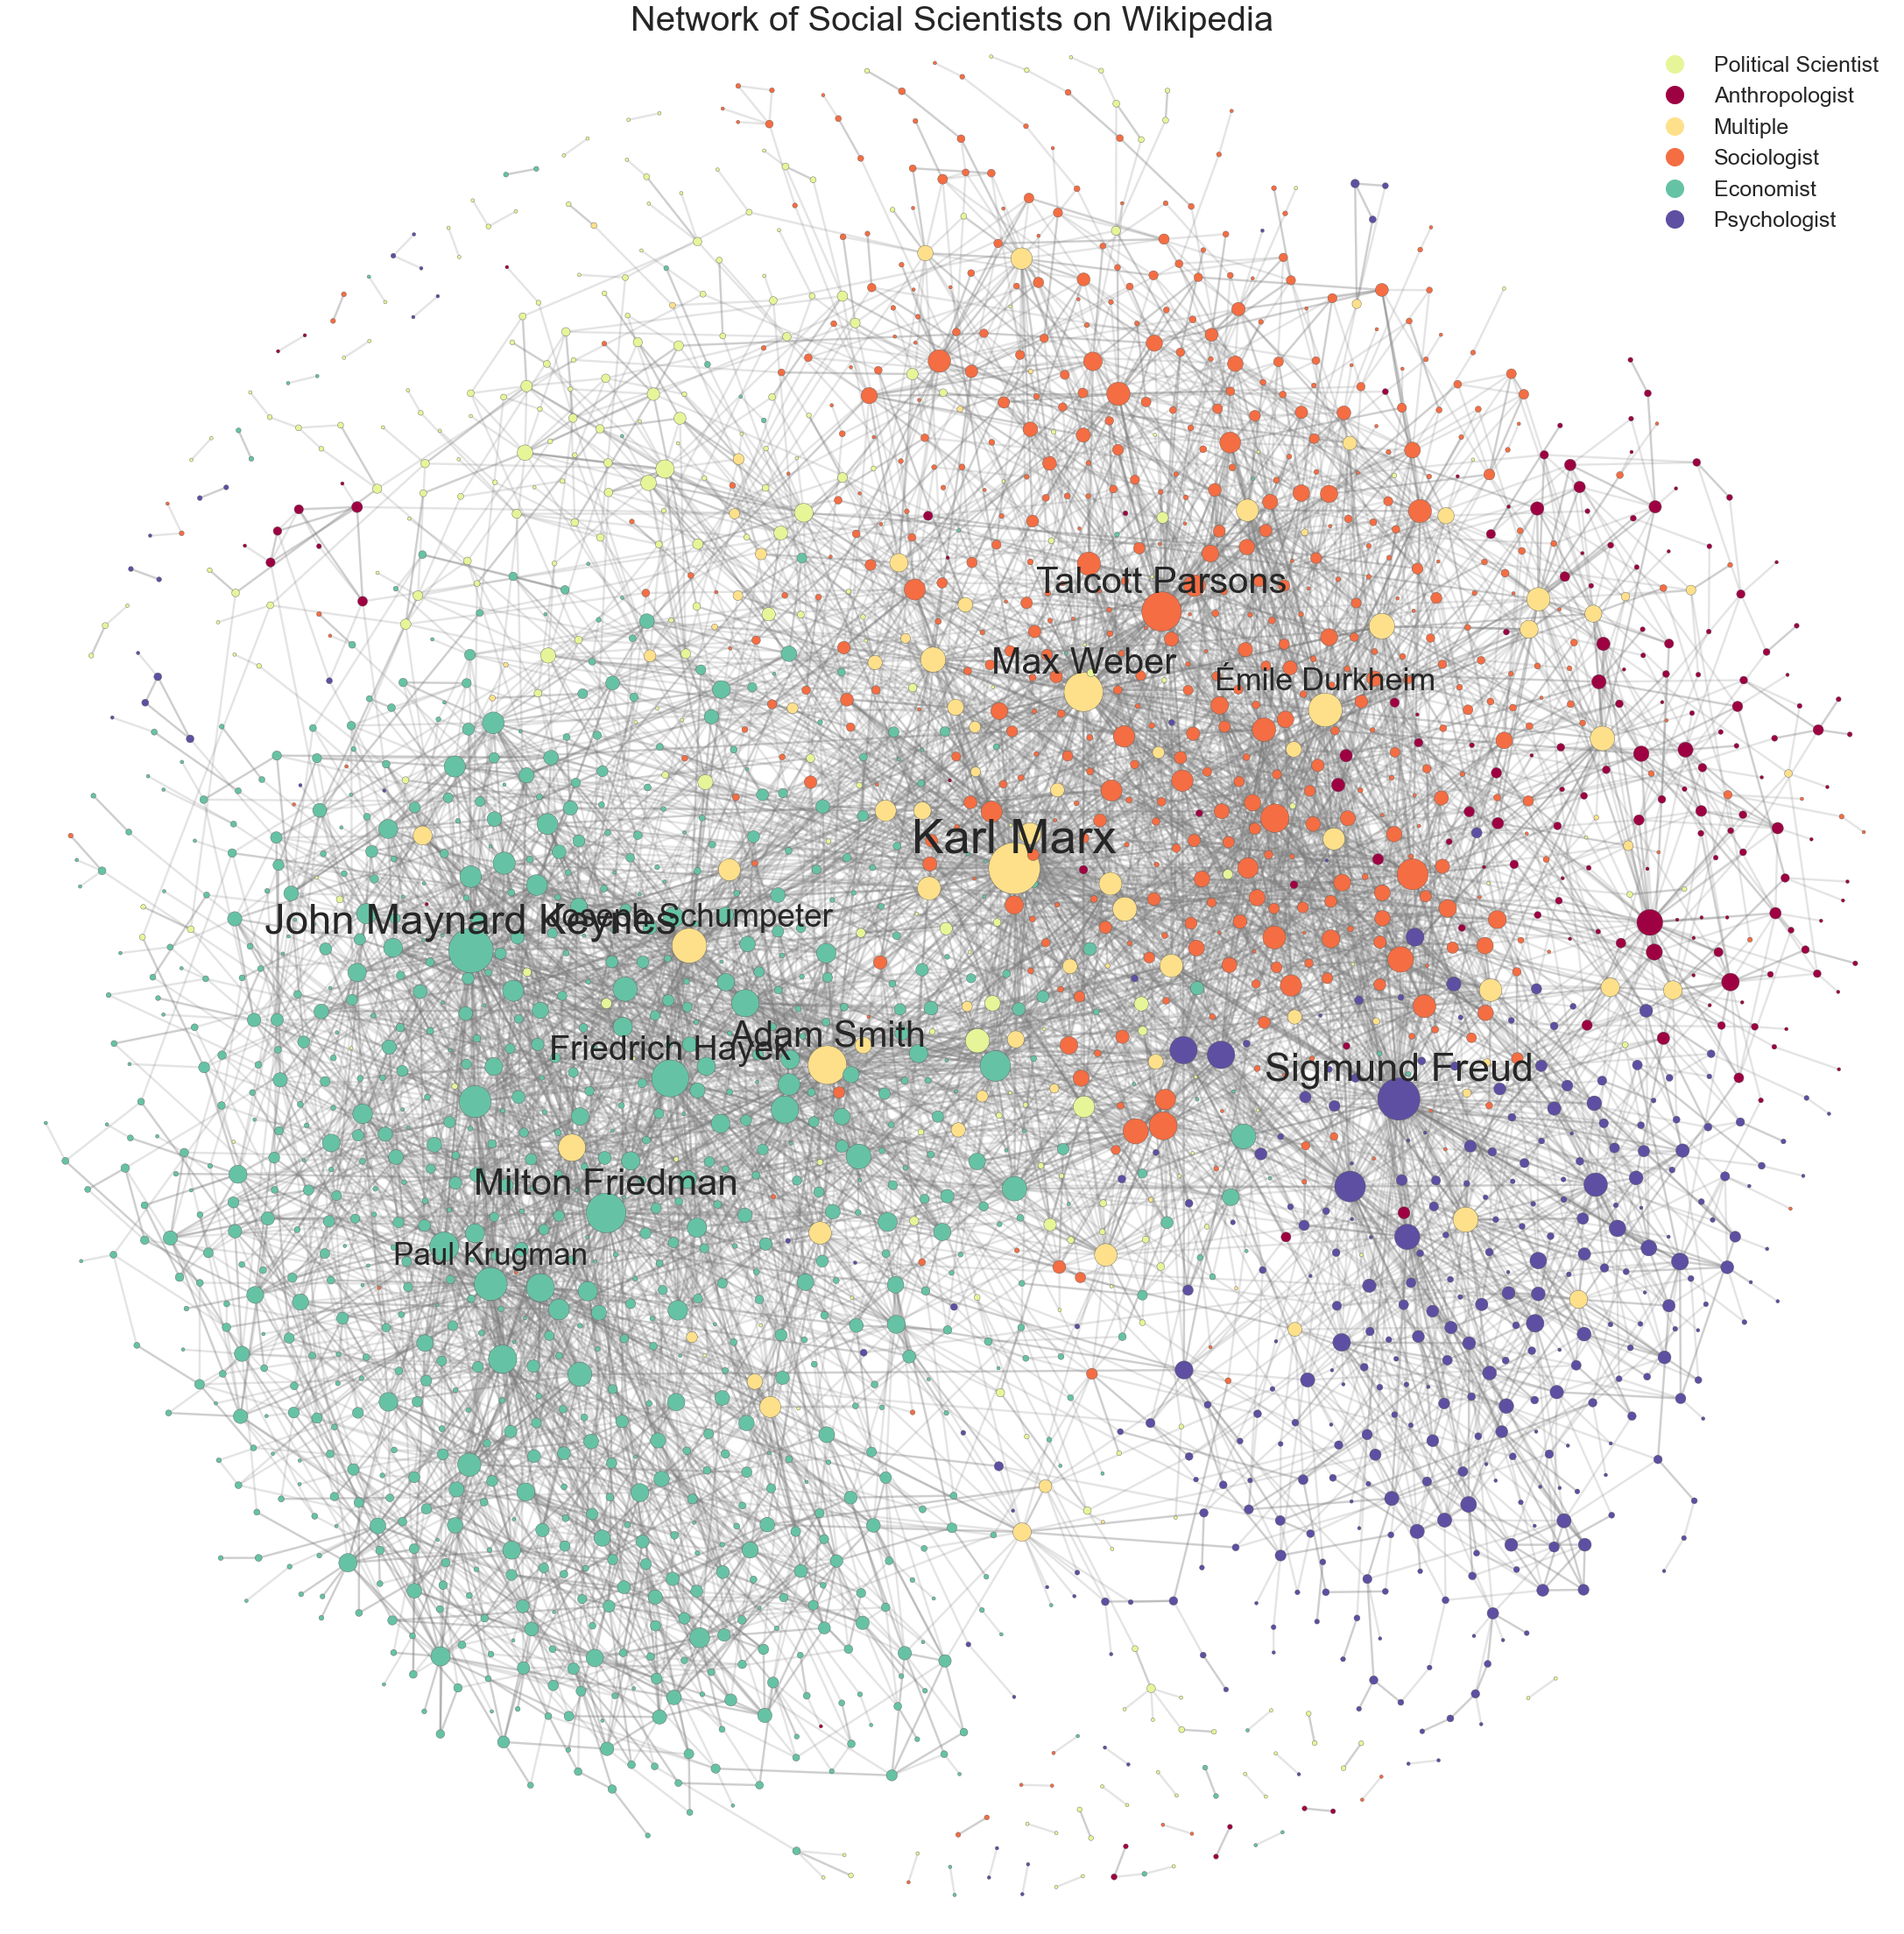

In [13]:
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-white')
# Drawing a big figure
plt.rcParams["figure.figsize"] = (30,30)

#Drawing the network
fig, ax = nw.draw_netwulf(network)

# assigning labels only to the largest nodes 
for node_nr in range(len(network['nodes'])):
    if network['nodes'][node_nr]['radius']>7:
        nw.tools.add_node_label(ax,
                                network,
                                dy = 12,
                                node_id = network['nodes'][node_nr]['id'],
                                size=network['nodes'][node_nr]['radius']*5)
    else:
        pass


val_map = {inv_science_dict[node['id']]:node['color'] for node in network['nodes']}

# Add legends
for label in val_map.keys():
    ax.plot([],[],color=val_map[label], label=label, marker='o', linestyle="None", markersize = 20)

plt.legend(fontsize = 25)
ax.set_title('Network of Social Scientists on Wikipedia', size = 40)
# Saving as pdf
#plt.savefig('Plots/field_network_title.png', dpi=None, facecolor='w', edgecolor='w', bbox_inches='tight')

Save the configuration for plotting the same network later, but with colors based on the community partition.

In [ ]:
''' Save the network configurations '''
# with open("network_configurations/big_network.json", 'w') as f:
#     json.dump(network, f)
    
# with open("network_configurations/big_config.json", 'w') as f:
#     json.dump(config, f)

### Descriptive statistics on the network

In [14]:
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-white')

''' Function to plot Degree distribution '''
def plot_deg_dist(deg_seq, title = 'Degree distribution', save = False, save_title = "", kwgs = {}):
    plt.style.use('ggplot')
    
    fig, ax = plt.subplots(2,1, figsize=(10,8))
    
    sns.scatterplot(x=deg_seq.keys(), y=deg_seq.values(), ax = ax[0], **kwgs)
    ax[0].set_title(title)
    ax[0].set_ylabel('Frequency', size = 15)
    
    del deg_seq[0] # messes up the log plot so remove 0 deg nodes 
    sns.scatterplot(x=deg_seq.keys(), y=deg_seq.values(), ax = ax[1], **kwgs)

    ax[1].set_title(title + ' (log scaled)')
    ax[1].set_ylabel('Frequency', size = 15)
    ax[1].set_xlabel('k', size = 15)
    # logscale the axes
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    
    if save:
        plt.savefig(f'Plots/{save_title}.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')
    plt.show()

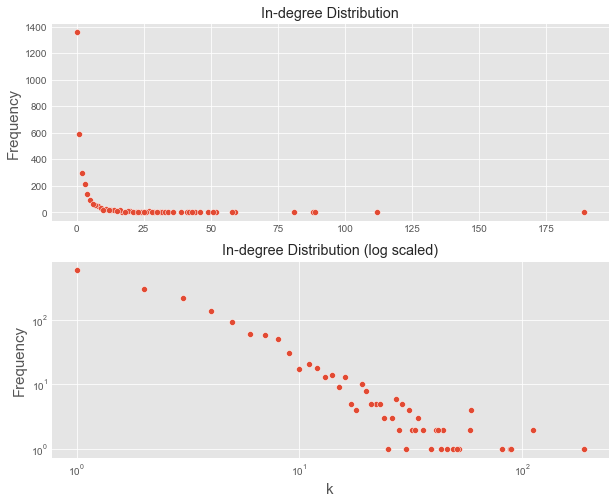

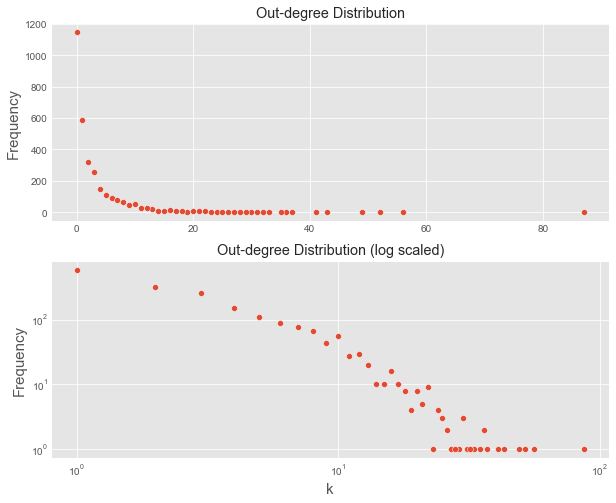

In [15]:
''' Plot degree distribution '''
import seaborn as sns
from collections import Counter

# Get in and out degree
in_deg_dist = Counter([d for n,d in G.in_degree()])
out_deg_dist = Counter([d for n,d in G.out_degree()])

# Plot and save 
plot_deg_dist(in_deg_dist, 'In-degree Distribution', save=False, save_title="in_deg_dist")
plot_deg_dist(out_deg_dist, 'Out-degree Distribution', save=False, save_title= "out_deg_dist")

#### Plot the most connected nodes based on in- and out- degree

In [16]:
''' Plot the top X out- and in- degree nodes '''
def plot_top_nodes(top_n = 50, in_deg = True, save=False, save_title = ""):
    if in_deg:
        top_nodes = sorted(dict(G.in_degree()).items(), key = lambda x: x[1], reverse = True)[:top_n]
    else:
        top_nodes = sorted(dict(G.out_degree()).items(), key = lambda x: x[1], reverse = True)[:top_n]
    x = [_[0] for _ in top_nodes]
    y = [_[1] for _ in top_nodes]

    fig, ax = plt.subplots(figsize = (12,6))
    sns.scatterplot(x,y, ax=ax)
    ax.set_ylabel('Degree', size = 15)
    plt.xticks(rotation=90, size = 12)
    if in_deg:
        ax.set_title(f'Distribution of in-degree for top {top_n}', size = 15)
    else:
        ax.set_title(f'Distribution of out-degree for top {top_n}', size = 15)
        
    # Saving as pdf
    if save:
        plt.savefig(f'Plots/{save_title}.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')
    plt.show()

C:\Users\Bruger\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


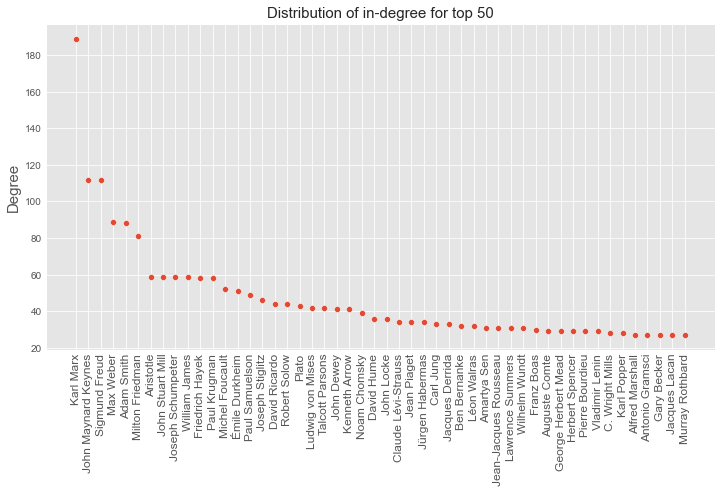

C:\Users\Bruger\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


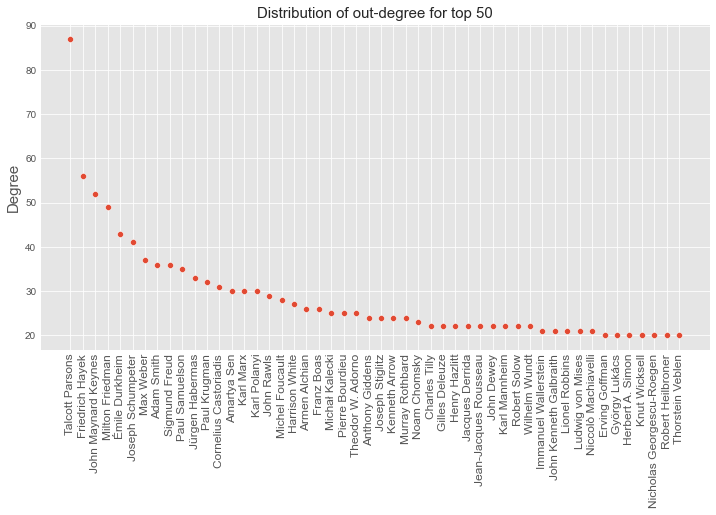

In [17]:
''' Call function '''
plot_top_nodes(in_deg = True, save_title="top_in_deg")
plot_top_nodes(in_deg = False, save_title="top_out_deg")

# Tools, theory and analysis. Describe the process of theory to insight <a name="analyse"></a>


- Talk about how you've worked with text, including regular expressions, unicode, etc.

- Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.

- How did you use the tools to understand your dataset?

This section is structured in three parts. The first part we look into our network looking into which communities are formed using the Louvain Partition. The second part we use TF-IDF. By doing this we use the texts we gathered for each social scientist to map them and explore the exposed characteristics. In the third and last part of the analysis we use HSBM on the text, and compare the topics found with the communities found in the first part and the topics found in the TF-IDF.   

## Communities <a name="communities"></a>

Now that we have present some basic statistic of the network, we will will examine how and which communities are formed in the network based on the modularity optimization of the Louvain Partition. BY doing this we hope to map and nuance the tradtional view of five disciplines within the social science. (TRÅDFØR LIGE MED MOTIVATIONEN NÅR VI VED NOGET DERFRA)


#### Our tools for community detection

For constructing our communities we have used the Louvain algorithm, which we explain in detail below.

The Louvain algorithm partitions the network by finding the partition that optimizes modularity, defined as (Barabási eq. 9.12): $M = \sum_{c=1}^{n_c}\left[\frac{L_c}{L}-\left(\frac{k_c}{2L}\right)^2\right]$, where $n_c$ is the number of communities/partitions, $L$ is the total number of links in the network, $L_c$ is the total number of links within community $C_c$, and $k_c$ is the total degree of the nodes in this community (including links to nodes outside community $C_c$). The Louvain algorithm works in 2 steps:
- **1) Modularity optimization**: Each node in the network is assigned to its own community. Sequentially, each node, $i$, is moved to the neighboring community, $j$, that leads to the maximum change in modularity, $\Delta M$. This is done repeadtly and sequentially until $\Delta M = 0$, i.e. there is no change in modularity by moving any node to another community.  The change in modularity, when moving node $i$ from one community to another, is calculated as (Barabási eq 9.58);
    
     $$\Delta M=\left[\frac{\sum_{in}+2k_{i,in}}{2W} - \left(\frac{\sum_{tot}+k_{i}}{2W}\right)^2 \right] - \left[\frac{\sum_{in}}{2W} - \left(\frac{\sum_{tot}}{2W}\right)^2 - \left(\frac{k_{i}}{2W}\right)^2 \right] $$
     
    where $\sum_{in}$ is the sum of all the weights of links inside the community, $C_j$, that $i$ is moved into (=$L_{C_{j}}$ in an undirected network); $\sum_{tot}$ is the sum of all the weights of the links to nodes in $C_j$; $k_i$ is the weighted degree of $i$; $k_{i,in}$ is the sum of the weights of the links between $i$ and other nodes in $C_j$; and $W$ is the sum of the weights of all links in the network. If $\Delta M < 0$, $i$ stays in its current community. 
- **2) Community Aggregation**: A weighted network is created as an aggregate of the communities from the previous step: The nodes in the weighted network are the communities from step 1, the edge weights are the sum of edges between communities, and edges within a community becomes 2 self-loops.

When the network of step 2 has been created, step 1 and 2 can be repeated on the new network until there is no increase in modularity. Collectively, the 2 steps are called a pass (Barabási Chap. 9). The 2 steps in the Louvain Algorithm are depicted below, where they are repeated for 2 passes (Barabási Image 9.37):   
<img src="louvain.jpg" alt="drawing" style="width:750px;"/>

#### Code

In [1]:
import community

''' Only the GCC, otherwise there will be about 300+ communities '''
G_c = G.copy()
c = max(nx.weakly_connected_components(G_c), key=len) # largest connected component
GCC = G_c.subgraph(c).copy() # make subgraph of the largest connected component
G_undir = GCC.to_undirected().copy() # undirected

# Louvain modularity for partition
partition = community.best_partition(G_undir, random_state = 280395)

NameError: name 'G' is not defined

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-white')

com_dict = {_com:{n for n, d in partition.items() if d == _com} for _com in range(max(partition.values())+1)}

''' Rename communities after their 3 most connected nodes '''
def sort_dict(_dict, reverse = False):
    return (dict(sorted(_dict.items(), key=lambda x: x[1], reverse = reverse)))

named_com_dict = com_dict.copy()
# loop over community and their nodes 
for _com, _nodes in com_dict.items():
    # dictionary with {node:degree}
    node_degree_dict = {node:G_undir.degree()[node] for node in _nodes}
    # sort based on degree
    node_degree_dict = sort_dict(node_degree_dict, reverse = True)
    # Get the 3 most connected
    top_3_connected = list(node_degree_dict.keys())[:3]
    # Turn the top 3 into a single string + remove the extentions of very long names link Esben, the first of the seas 
    top_3_connected = ' - '.join([str(n).split(',')[0] for n in top_3_connected])
    # remove parentheses like Sune (Social Data Scientist)
    top_3_connected = re.sub(' \(.*?\)', '', top_3_connected)
    # rename the community after the 3 most connected nodes 
    named_com_dict[top_3_connected] = named_com_dict.pop(_com)
    # Rename the community names in the partition dict
    for node in _nodes:
        partition[node] = top_3_connected

com_size_dict = {_com:len(nodes) for _com, nodes in named_com_dict.items()} # get com_size
com_size_dict = sort_dict(com_size_dict, reverse = True) # sort dict 

plt.rcParams["figure.figsize"] = (10,6)

x = list(com_size_dict.keys())
y = list(com_size_dict.values())
plt.plot(x,y, marker='o', c='black')
plt.xticks(rotation=90)
plt.xlabel('Community (top 3 connected nodes)', size = 12)
plt.ylabel('Community Size', size = 12)
plt.title('Distribution of Community Size', size = 15)
#plt.savefig(f'Plots/community_size.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')

In [ ]:
# Dict with name as key and field and community dicts as values 
joined_dict = {name:{'field':inv_science_dict[name], 'community':com}\
               for name, com in partition.items()}

# with open('name_field_community.json', 'w', encoding = 'utf-8') as f: 
#     json.dump(joined_dict, f)
    
# # Save com sizes for index sorting 
# with open('com_size_dict.json', 'w', encoding = 'utf-8') as f: 
#     json.dump(com_size_dict, f)

In [2]:
''' Plot community partition '''
nx.set_node_attributes(G_undir, partition, name = 'group') # node attributes 
## Use the configs from the big non-GCC network
network_part, config_part = nw.visualize(G_undir, plot_in_cell_below=False, config = config)
# Recolor based on Spectral colormap 
network_part = redefine_attr(network_part, partition)

fig, ax = nw.draw_netwulf(network_part, figsize = 10)

# {community:color} dict for the legend
val_map = {partition[node['id']]:node['color'] for node in network_part['nodes']}

# Add legends
for v in sorted(val_map.keys()):
    plt.scatter([],[],color=val_map[v], 
                label=v, 
                marker='o',
                edgecolors= "grey",
                linestyle="None")
    
# Sort and Place legend
handles, labels = plt.gca().get_legend_handles_labels()
# Get the order of the legend - Based on community size 
order = [labels.index(_com) for _com in list(com_size_dict.keys())]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           bbox_to_anchor = (1,0.75), frameon=True)

# Ugly, but works 
plt.title('Community Detection', x = 0.73, size = 15)

# Saving as pdf
# fig.savefig(f'Plots/community_network.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')

NameError: name 'nx' is not defined

In [ ]:
''' Plot community partition '''
nx.set_node_attributes(G_undir, inv_science_dict, name = 'group') # node attributes 
## Use the configs from the big non-GCC network
network_part, config_part = nw.visualize(G_undir, plot_in_cell_below=False, config = config)

# Recolor based on Spectral colormap 
network_part = redefine_attr(network_part, inv_science_dict)

fig, ax = nw.draw_netwulf(network_part, figsize = 10)

# {community:color} dict for the legend
val_map = {inv_science_dict[node['id']]:node['color'] for node in network_part['nodes']}

# Add legends
for v in sorted(val_map.keys()):
    plt.scatter([],[],color=val_map[v], 
                label=v, 
                marker='o',
                edgecolors= "grey",
                linestyle="None")
# Place legend
plt.legend(frameon=True)
plt.title('Discipline Network', size = 15)
#fig.savefig(f'Plots/gcc_network.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')

#### Conclusion on Communities

When using the Louvain Partition, we find 22 communities. They differ a lot in size, with the largest being above 400 and the lowest being two. Looking into the largest communities we find that both the largest and the thirds largest communities seem focused around economists with Keynes, Smith, Friedman, Kahneman, Acemoglu, and Mankiw. This could be because economists maybe are clustered within themselves or it could be because we simply just have more economists in the dataset, and therefore are some of the largest communities centered around economists’ communities. We also see smaller but similar communities for the other disciplines: Boas, Polanyi, and Jung are all psychologists, and Malinowski, Polanyi, and Boas all anthropologists, and Kissinger, Waltz, and Huntington all being Political Scientists. 

The second largest community is composed of Marx, Freud, and Weber. Both Marx and Weber are classified as being multiple, which maybe also shows that they have a larger reach than most. Freud is also a rather renown theorist even though he only is classified as a psychologist. Marx and Freud have been classified as the hermeneutics of suspicion (https://en.wikipedia.org/wiki/Hermeneutics_of_suspicion), so with that in mind it makes sense that those two are in the same community. 



### TF-IDF  <a name="TF-IDF"></a>

In [24]:
with open(f'wiki_dict_noname.json','r', encoding = 'utf-8') as f:
    name_txt = json.load(f)
    
with open(f'name_field_community.json','r', encoding = 'utf-8') as f:
    name_field_com = json.load(f)
    
def preprocess(text, remove_stopwords=True):
    import nltk
    import string 
    from nltk.corpus import stopwords

    # import stopwords
    stop_words_list = stopwords.words("english")

     # 1) Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    if remove_stopwords:
        # 2) Remove stopwords and tokenize
        tokens = [token for token in nltk.word_tokenize(text.lower()) if token not in stop_words_list]
    else:
        # 2) Tokenize
        tokens = [token for token in nltk.word_tokenize(text.lower())]

    # 3) Lammetize = convert words to their root (running -> run)
    wnl = nltk.WordNetLemmatizer() 
    lemmas = [wnl.lemmatize(t) for t in tokens] 
    return lemmas # return a list of stems/lemmas

### Dictionaries where the wiki-text is split based on scientific field, and community from Louvain Partition respectively. 

In [26]:
# Empty dicts 
field_dict = {val['field']:[] for _key, val in name_field_com.items()}
com_dict = {val['community']:[] for _key, val in name_field_com.items()}

cnt = 0
for name, txt in name_txt.items():
    if name in name_field_com.keys():
        cnt += 1
        _key = name_field_com[name]['field']
        txt = preprocess(txt) # preprocess 
        field_dict[_key] += txt      
print('In field_dict: ', cnt) # should be 2105

cnt = 0
for name, txt in name_txt.items():
    if name in name_field_com.keys():
        cnt += 1
        _key = name_field_com[name]['community']
        txt = preprocess(txt) # preprocess 
        com_dict[_key] += txt      
print('In com_dict: ', cnt) # should be 2105

In field_dict:  2105
In com_dict:  2105


In [ ]:
# ''' Saving '''
# with open(f'field_txt_dict.json','w', encoding = 'utf-8') as f:
#     json.dump(field_dict, f)
    
# with open(f'com_txt_dict.json','w', encoding = 'utf-8') as f:
#     json.dump(com_dict, f)

In [27]:
import math
# We define function for the tf-idf - we use them through the assignment
''' Used throughout the assignment '''
def sort_dict(_dict):
    return (dict(sorted(_dict.items(), key=lambda x:x[1], reverse = True)))

''' We set up the needed functions: TC, TF and IDF + A preprocessing function '''
def _TC(_tokens):
    ''' Returns a dict with words as keys and their frequency in the document as values '''
    unique_words = set(_tokens) # unique words
    freq_dict = dict.fromkeys(unique_words, 0) # empty dict with each unique word as key and with val=0
    for word in _tokens:
        freq_dict[word] += 1 # count the words 
    return freq_dict


def computeTF(_tokens):
    ''' Input is a tokenized document. 
    Output is a dict with unique words, sorted by TF in descending order '''
    bagOfWords = _TC(_tokens) # call BoW/TC function
    tfDict = {} 
    bagOfWordsCount = sum(bagOfWords.values()) # count number of words = sum of the frequencies 
    for word, count in bagOfWords.items(): # loop over the words and their frequnecy
        tfDict[word] = count / float(bagOfWordsCount)
    # Sort based on TF-value
    return sort_dict(tfDict)

def computeIDF(documents):
    ''' The input should be a dictionary where the keys are the documents and the values
    are the tokenized content belonging to the documents '''
    N = len(documents) # count number of documents 
    vocab = set([_w for _race, txt in documents.items() for _w in txt]) # Get the entire vocab from all docs
    idfDict = dict.fromkeys(vocab, 0) # dict with words as keys and count/val set to 0

    for document, txt in documents.items(): # loop over the documents/keys and their content/values
        _bow = _TC(txt) # create bag_of_words/TC for the document
        for word, val in _bow.items(): # loop over every unique word in the document 
            idfDict[word] += 1 # increment by one, for each document the word appears in 
            
    # for all the words in the vocab/corpus and the number documents they appear in 
    for word, val in idfDict.items(): 
        idfDict[word] = math.log(N / float(val)) # calculate the idf for each word 
    return idfDict

def calc_tf_idf(document_content_dict, tc_instead = False):
    ''' The input should be a dictionary where the keys are the documents and the values
    are the tokenized content belonging to the documents '''
     # get vocab across all documents 
    vocab = set([_w for _com, txt in document_content_dict.items() for _w in txt])
    _idf = computeIDF(document_content_dict) # compute idf of the documents 
    tf_idf_list = [] # list to append lists of tf_ids's to, for each community
    for _com, _txt in document_content_dict.items(): # loop over the documents 
        com_tf = computeTF(_txt) # calc the com's tf 
        if tc_instead:
            com_tf = _TC(_txt) # if the TC is needed instead of the TF
        
        # loop over the words in the communities vocab
        # if the word is in the com_corpus, calc tf_idf - otherwise return 0 
        tf_idf = [_idf[_w] * com_tf[_w] if _w in com_tf.keys() else 0 for _w in vocab]
        tf_idf_list += [tf_idf] # append the row --> one row for each race      

    # Create tf_idf df (or tc_idf, if that was chosen)
    tf_idf_df = pd.DataFrame(tf_idf_list,
                             index=document_content_dict.keys(),
                             columns = set([_w for _com, txt in document_content_dict.items()\
                                            for _w in txt])).transpose() # transpose 
    if tc_instead:
        return round(tf_idf_df) # round to nearest whole number
    return tf_idf_df

In [28]:
# Calculate Tf-idf for community and scientific field
field_tf_idf = calc_tf_idf(field_dict)
com_tf_idf = calc_tf_idf(com_dict)

### TABELLER AF TC-IDF

In [29]:
import json 
# import community sizes 
with open('com_size_dict.json', 'r', encoding = 'utf-8') as f: 
    com_size_dict = json.load(f)

In [30]:
print('The top 5 words in each scientific field based on tf')

# calc top 5 tf ranks for each community 
l = [list(computeTF(_txt))[:5] for _com, _txt in field_dict.items()] 
# to df 
_df = pd.DataFrame(l, index = field_dict.keys())
_df.columns = range(1,6) # rename columns 
_df = _df.rename_axis('↓ Scientific Field', axis = 0)
_df = _df.rename_axis('Rank of word based on TF →', axis = 1).sort_index()

''' save df as html table '''
# with open('html_tables/field_tf.html', "w", encoding='utf-8') as f:
#     f.write(_df.to_html().replace('border="1"','border="0"')) # set border = 0, to make it prettier

_df

The top 5 words in each scientific field based on tf


Rank of word based on TF →           1             2           3  \
↓ Scientific Field                                                 
Anthropologist              university  anthropology    american   
Economist                    economics      economic  university   
Multiple                        social          work  university   
Political Scientist         university     political    american   
Psychologist                psychology    university        work   
Sociologist                 university        social   sociology   

Rank of word based on TF →              4        5  
↓ Scientific Field                                  
Anthropologist                       work      new  
Economist                          theory      new  
Multiple                          society   theory  
Political Scientist         international  science  
Psychologist                     research   theory  
Sociologist                          work      new

In [31]:
''' The 5 most important word for each scientific field based on TF-IDF'''

# get top 5 words for each top 5 community based on tf_idf
l =  [list(field_tf_idf[_field].sort_values(ascending=False)[:5].index) for _field in field_tf_idf.columns]

# to df 
_df = pd.DataFrame(l, index = field_tf_idf.columns)
_df.columns = range(1,6) # rename columns 
_df = _df.rename_axis('↓ Scientific Field', axis = 0)
_df = _df.rename_axis('Rank of word based on TF-IDF →', axis = 1).sort_index()

''' save df as html table '''
# with open('html_tables/field_tf_idf.html', "w", encoding='utf-8') as f:
#     f.write(_df.to_html().replace('border="1"','border="0"')) # set border = 0, to make it prettier

_df

Rank of word based on TF-IDF →            1               2              3  \
↓ Scientific Field                                                           
Anthropologist                      gorilla          apache           zuni   
Economist                       econometric    econometrics  macroeconomic   
Multiple                            khaldūn         habitus         samoan   
Political Scientist                 dodgson           arend     neorealism   
Psychologist                            apa  psychoanalytic  psychotherapy   
Sociologist                       wallpaper      sociologie   gemeinschaft   

Rank of word based on TF-IDF →          4               5  
↓ Scientific Field                                         
Anthropologist                   iroquois         olduvai  
Economist                       keynesian  macroeconomics  
Multiple                            hardt  psychoanalytic  
Political Scientist                   ndp             nsc  
Psychologist                      jungian         therapy  
Sociologist                        ortega          cyborg

In [32]:
print('The top 5 words in each communities based on tf')

# Sort based on community size 
com_dict = dict(sorted(com_dict.items(), key=lambda x: com_size_dict[x[0]], reverse= True))

# calc top 5 tf ranks for each community 
l = [list(computeTF(_txt))[:5] for _com, _txt in com_dict.items()] 

# to df 
_df = pd.DataFrame(l, index = com_dict.keys())
_df.columns = range(1,6) # rename columns 
_df = _df.rename_axis('↓ Community', axis = 0)
_df = _df.rename_axis('Rank of word based on TF →', axis = 1)

''' save df as html table '''
# with open('html_tables/community_tf.html', "w", encoding='utf-8') as f:
#     f.write(_df.to_html().replace('border="1"','border="0"')) # set border = 0, to make it prettier

_df

The top 5 words in each communities based on tf


Rank of word based on TF →                                   1              2  \
↓ Community                                                                     
John Maynard Keynes - Adam Smith - Milton Friedman    economic      economics   
Karl Marx - Sigmund Freud - Max Weber               university           work   
Daniel Kahneman - Daron Acemoglu - Greg Mankiw      university      economics   
Talcott Parsons - John Dewey - Erving Goffman           social     university   
Wilhelm Wundt - Jean Piaget - Carl Jung             psychology     university   
Franz Boas - Karl Polanyi - Bronisław Malinowski    university   anthropology   
Samuel P. Huntington - Kenneth Waltz - Henry Ki...  university  international   
Immanuel Wallerstein - Paul Sweezy - Rosa Luxem...  university      political   
David Butler - Robert McKenzie - Larry Bartels       political       election   
David G. Bromley - Benjamin Zablocki - Jeffrey ...  university      religious   
E. Wight Bakke - Neil W. Chamberlain - James G....  university   organization   
Sylvia Walby - Scott Lash - John Urry               university         gender   
Jean Séguy - Jean-Paul Willaime - Ernst Troeltsch           de       religion   
Gloria Macapagal Arroyo - Randy David - Solita ...          ra     philippine   
Volkmar Sigusch - Martin Dannecker - Gunter Sch...         der            und   
Ray Blanchard - Richard Green - Kenneth Zucker          gender         sexual   
Michel Balinski - Steven Brams - Peyton Young           theory           game   
James Brander - Tracy R. Lewis - Barbara J. Spe...  university      economics   
Hjalmar Schacht - Montagu Norman - Gustave Gilbert      german         hitler   
Richard Portes - Richard Baldwin - Joseph Francois  university       economic   
Marilyn Waring - Margunn Bjørnholt - Walden Bello        woman            new   
Raewyn Connell - Ashis Nandy                                 –     university   

Rank of word based on TF →                                      3           4  \
↓ Community                                                                     
John Maynard Keynes - Adam Smith - Milton Friedman     university      theory   
Karl Marx - Sigmund Freud - Max Weber                      social         new   
Daniel Kahneman - Daron Acemoglu - Greg Mankiw           economic    research   
Talcott Parsons - John Dewey - Erving Goffman           sociology    american   
Wilhelm Wundt - Jean Piaget - Carl Jung                      work       child   
Franz Boas - Karl Polanyi - Bronisław Malinowski         american         new   
Samuel P. Huntington - Kenneth Waltz - Henry Ki...      political       state   
Immanuel Wallerstein - Paul Sweezy - Rosa Luxem...       american         new   
David Butler - Robert McKenzie - Larry Bartels            british  university   
David G. Bromley - Benjamin Zablocki - Jeffrey ...       religion   sociology   
E. Wight Bakke - Neil W. Chamberlain - James G....     management    research   
Sylvia Walby - Scott Lash - John Urry                     society      sylvia   
Jean Séguy - Jean-Paul Willaime - Ernst Troeltsch           paris          et   
Gloria Macapagal Arroyo - Randy David - Solita ...            act    coauthor   
Volkmar Sigusch - Martin Dannecker - Gunter Sch...      frankfurt      german   
Ray Blanchard - Richard Green - Kenneth Zucker                sex       child   
Michel Balinski - Steven Brams - Peyton Young          university         new   
James Brander - Tracy R. Lewis - Barbara J. Spe...  international    economic   
Hjalmar Schacht - Montagu Norman - Gustave Gilbert        germany         war   
Richard Portes - Richard Baldwin - Joseph Francois       research       trade   
Marilyn Waring - Margunn Bjørnholt - Walden Bello        research     zealand   
Raewyn Connell - Ashis Nandy                               oxford         new   

Rank of word based on TF →                                      5  
↓ Community                               

In [33]:
''' The 5 most important word for each community based on TF-IDF'''

# get top 5 words for each top 5 community based on tf_idf
l =  [list(com_tf_idf[_com].sort_values(ascending=False)[:5].index) for _com in com_dict.keys()]

# to df 
_df = pd.DataFrame(l, index = com_dict.keys())
_df.columns = range(1,6) # rename columns 
_df = _df.rename_axis('↓ Community', axis = 0)
_df = _df.rename_axis('Rank of word based on TF-IDF →', axis = 1)

''' save df as html table '''
# with open('html_tables/community_tf_idf.html', "w", encoding='utf-8') as f:
#     f.write(_df.to_html().replace('border="1"','border="0"')) # set border = 0, to make it prettier
    
_df

Rank of word based on TF-IDF →                                    1  \
↓ Community                                                           
John Maynard Keynes - Adam Smith - Milton Friedman        economics   
Karl Marx - Sigmund Freud - Max Weber                    philosophy   
Daniel Kahneman - Daron Acemoglu - Greg Mankiw            economics   
Talcott Parsons - John Dewey - Erving Goffman               chicago   
Wilhelm Wundt - Jean Piaget - Carl Jung                  psychology   
Franz Boas - Karl Polanyi - Bronisław Malinowski       anthropology   
Samuel P. Huntington - Kenneth Waltz - Henry Ki...              war   
Immanuel Wallerstein - Paul Sweezy - Rosa Luxem...        political   
David Butler - Robert McKenzie - Larry Bartels             election   
David G. Bromley - Benjamin Zablocki - Jeffrey ...      scientology   
E. Wight Bakke - Neil W. Chamberlain - James G....   organizational   
Sylvia Walby - Scott Lash - John Urry                        sylvia   
Jean Séguy - Jean-Paul Willaime - Ernst Troeltsch         religieux   
Gloria Macapagal Arroyo - Randy David - Solita ...               ra   
Volkmar Sigusch - Martin Dannecker - Gunter Sch...  sexualforschung   
Ray Blanchard - Richard Green - Kenneth Zucker                 camh   
Michel Balinski - Steven Brams - Peyton Young                    hp   
James Brander - Tracy R. Lewis - Barbara J. Spe...     brandermodel   
Hjalmar Schacht - Montagu Norman - Gustave Gilbert       reichsbank   
Richard Portes - Richard Baldwin - Joseph Francois            usitc   
Marilyn Waring - Margunn Bjørnholt - Walden Bello           muldoon   
Raewyn Connell - Ashis Nandy                                  delhi   

Rank of word based on TF-IDF →                                   2  \
↓ Community                                                          
John Maynard Keynes - Adam Smith - Milton Friedman        economic   
Karl Marx - Sigmund Freud - Max Weber                         idea   
Daniel Kahneman - Daron Acemoglu - Greg Mankiw        econometrics   
Talcott Parsons - John Dewey - Erving Goffman            sociology   
Wilhelm Wundt - Jean Piaget - Carl Jung                      child   
Franz Boas - Karl Polanyi - Bronisław Malinowski    anthropologist   
Samuel P. Huntington - Kenneth Waltz - Henry Ki...          soviet   
Immanuel Wallerstein - Paul Sweezy - Rosa Luxem...        portugal   
David Butler - Robert McKenzie - Larry Bartels                   ‘   
David G. Bromley - Benjamin Zablocki - Jeffrey ...       religious   
E. Wight Bakke - Neil W. Chamberlain - James G....      management   
Sylvia Walby - Scott Lash - John Urry                    lancaster   
Jean Séguy - Jean-Paul Willaime - Ernst Troeltsch           sectes   
Gloria Macapagal Arroyo - Randy David - Solita ...      philippine   
Volkmar Sigusch - Martin Dannecker - Gunter Sch...             der   
Ray Blanchard - Richard Green - Kenneth Zucker          paraphilia   
Michel Balinski - Steven Brams - Peyton Young                 game   
James Brander - Tracy R. Lewis - Barbara J. Spe...      sappington   
Hjalmar Schacht - Montagu Norman - Gustave Gilbert          hitler   
Richard Portes - Richard Baldwin - Joseph Francois            cepr   
Marilyn Waring - Margunn Bjørnholt - Walden Bello          zealand   
Raewyn Connell - Ashis Nandy                                 ashis   

Rank of word based on TF-IDF →                                    3  \
↓ Community                                                           
John Maynard Keynes - Adam Smith - Milton Friedman            price   
Karl Marx - Sigmund Freud - Max Weber                   philosopher   
Daniel Kahneman - Daron Acemoglu - Greg Mankiw             economic   
Talcott Parsons - John Dewey - Erving Goffman                    du   
Wilhelm Wundt - Jean Piaget - Carl Jung               psychological   
Franz Boas - Karl Polanyi - Bronisław Malinowski    anthropological   
Samuel P. Huntington - Kenneth Waltz - Henry K

### HSBM Analysis <a name="HSBM"></a>

### HER SKAL NOGET HSBM IND

#### ANALYSE STRUKTUR: 
Explain the overall idea

- Analysis step 1
    - explain what you're interested in
    - explain the tool
    - apply the tool
    - discuss the outcome

- Analysis step 2
    - explain what you're interested in
    - explain the tool
    - apply the tool
    - discuss the outcome

- Analysis step 3,
... and so on until the analysis is done

# Discussion. Think critically about your creation <a name="discussion"></a>

- What went well?,
- What is still missing? What could be improved?, Why?

# Constributions <a name="contributions"></a>

- You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That’s what you should explain).

- It is not OK simply to write "All group members contributed equally".